# Exercise 2.1: Preprocessing (Effect of Outliers)

In [1]:
##Importing ##
import pandas as pd
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ashwin\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [410]:
df2 = pd.read_csv('dataset/pca2.csv')
df2 = np.array(df2)
df2_no_outlier = np.delete(df2 ,[16, 156], axis=-2)    #Specif Outlier Data REmoved

In [2]:
class PCA():
    def __init__(self, data, n_components):
        self.data = data   #mean cenetered data (observations x dimensions )
        self.covariance = (self.data.T@self.data)/(self.data.shape[0]-1)
        from numpy import linalg as LA
        self.lambd, self.eigenvec = LA.eig(self.covariance)  
        self.eigenvec = self.eigenvec[:,self.lambd.argsort()[::-1]] 
        self.data_design = self.data.T
        self.M_T = self.eigenvec.T
        self.n_components = n_components
        
    def fit(self):
        self.projection = self.M_T[np.arange(self.n_components),:]  @ self.data_design
        self.projection = self.projection.T   
        
    def whiten(self):
        self.eigen_value_matrix_sqrt = np.diag(1/np.sqrt(self.lambd))
        self.data_whitened = self.eigen_value_matrix_sqrt @  (self.M_T) @ (np.array(self.data_design))
        self.data_whitened = self.data_whitened.T
        return(self.data_whitened)

In [412]:
pca_with_outlier = PCA(df2,2)   #2 P.C's
pca_with_outlier.fit()

In [413]:
pca_without_outlier = PCA(df2_no_outlier,2)
pca_without_outlier.fit()

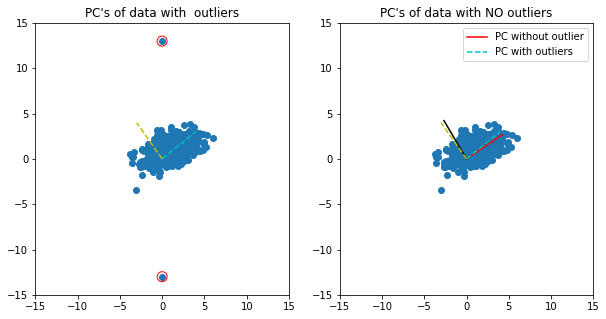

In [425]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].set_xlim([-15, 15])
axs[0].set_ylim([-15, 15])
axs[1].set_xlim([-15, 15])
axs[1].set_ylim([-15, 15])

axs[0].scatter(df2[:,0],df2[:,1])
axs[0].scatter(df2[:,0][16],df2[:,1][16], s=100, facecolors='none', edgecolors='r')
axs[0].scatter(df2[:,0][156],df2[:,1][156], s=100, facecolors='none', edgecolors='r')
axs[0].plot([0,5*pca_with_outlier.eigenvec[:,0][0]],[0,5*pca_with_outlier.eigenvec[:,0][1]], color='c', ls='--')
axs[0].plot([0,5*pca_with_outlier.eigenvec[:,1][0]],[0,5*pca_with_outlier.eigenvec[:,1][1]], color='y', ls='--')


axs[1].scatter(df2_no_outlier[:,0],df2_no_outlier[:,1])
axs[1].plot([0,5*pca_without_outlier.eigenvec[:,0][0]],[0,5*pca_without_outlier.eigenvec[:,0][1]], color='red', label='PC without outlier')
axs[1].plot([0,5*pca_without_outlier.eigenvec[:,1][0]],[0,5*pca_without_outlier.eigenvec[:,1][1]], color='k')
axs[1].plot([0,5*pca_with_outlier.eigenvec[:,0][0]],[0,5*pca_with_outlier.eigenvec[:,0][1]], color='c', label='PC with outliers', ls='--')
axs[1].plot([0,5*pca_with_outlier.eigenvec[:,1][0]],[0,5*pca_with_outlier.eigenvec[:,1][1]], color='y', ls='--')

_=plt.legend()
_=axs[0].set_title('PC\'s of data with  outliers')
_=axs[1].set_title('PC\'s of data with NO outliers')

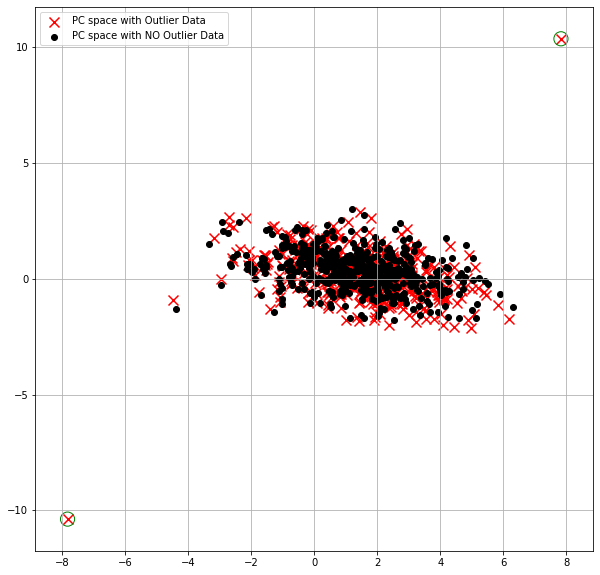

In [429]:
fig, axs = plt.subplots(1,1, figsize=(10,10))

axs.scatter(pca_with_outlier.projection[:,0],pca_with_outlier.projection[:,1], c='r', marker='x', s=100, label='PC space with Outlier Data')
axs.scatter(pca_with_outlier.projection[:,0][16],pca_with_outlier.projection[:,1][16], s=200, facecolors='none', edgecolors='g')
axs.scatter(pca_with_outlier.projection[:,0][156],pca_with_outlier.projection[:,1][156], s=200, facecolors='none', edgecolors='g')
axs.scatter(pca_without_outlier.projection[:,0],pca_without_outlier.projection[:,1], c='k', label='PC space with NO Outlier Data')
plt.legend()

plt.grid()

# Exercise 2.2: Whitening (Decorrelation + Standardizing)

In [431]:
df2 = pd.read_csv('dataset/pca4.csv')
df2 = df2.apply(lambda x: x-x.mean())

## PCA Method of Removing Outliers

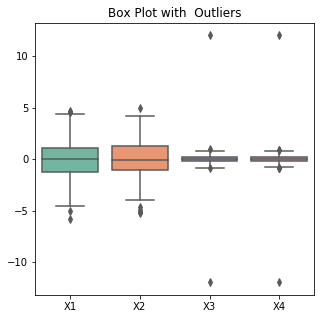

In [433]:
plt.subplots(1,1, figsize=(5,5))
sns.boxplot(data=df2, orient="v", palette="Set2")
_=plt.title("Box Plot with  Outliers")

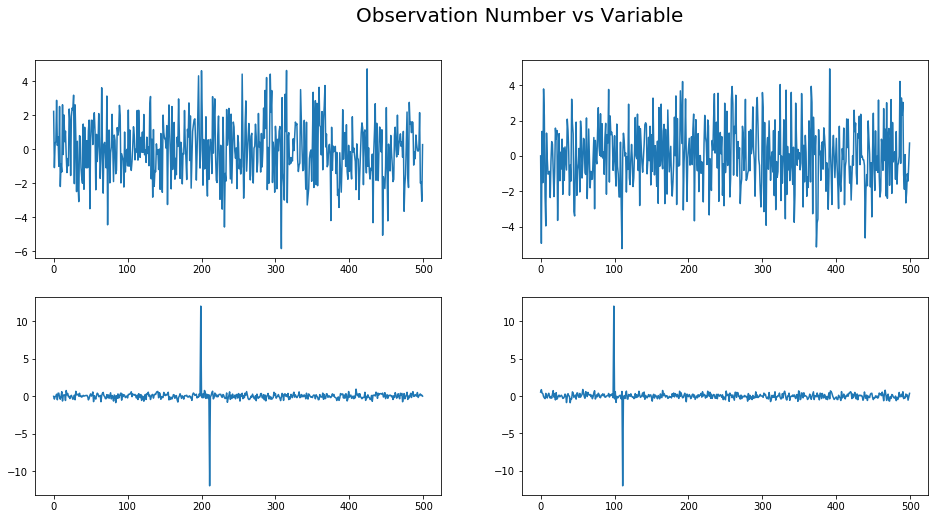

In [434]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot(np.arange(500), df2.X1)
axs[0,1].plot(np.arange(500), df2.X2)
axs[1,0].plot(np.arange(500), df2.X3)
axs[1,1].plot(np.arange(500), df2.X4)

_=plt.text(-250,50 ,'Observation Number vs Variable', size=20)

$$\text{Oultier Detection using Smallest Eigen Vector}$$

In [474]:
P = PCA(np.array(df2), 4)
P.fit()

In [476]:
smallest_eigen_vector = P.eigenvec[:,-1]     
smallest_eigen_vector =  smallest_eigen_vector.reshape(1,4)

In [507]:
proj_onto_smallest_eigen  =  smallest_eigen_vector @ np.array(df2).T
proj_onto_smallest_eigen = proj_onto_smallest_eigen.T

In [533]:
#index of data points that are safe to use
idx = np.where( (proj_onto_smallest_eigen >(np.quantile(proj_onto_smallest_eigen, 0.05))) &  (proj_onto_smallest_eigen <(np.quantile(proj_onto_smallest_eigen, 0.95)))  )

In [546]:
idx_outlier_indices = np.where( (proj_onto_smallest_eigen <(np.quantile(proj_onto_smallest_eigen, 0.05))) |  (proj_onto_smallest_eigen >(np.quantile(proj_onto_smallest_eigen, 0.95)))  )
idx_outlier_indices = idx_outlier_indices[0]

In [551]:
outlier_free_data = np.delete( np.array(df2), idx_outlier_indices,axis=-2)

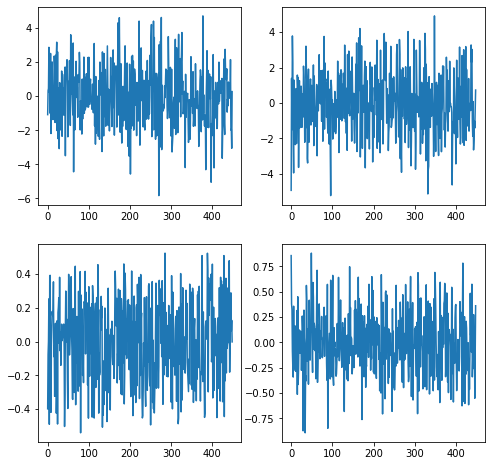

In [557]:
fig, axs = plt.subplots(2,2, figsize=(8,8))

axs[0,0].plot(np.arange(449), outlier_free_data[:,0] )
axs[0,1].plot(np.arange(449), outlier_free_data[:,1] )
axs[1,0].plot(np.arange(449), outlier_free_data[:,2] )
axs[1,1].plot(np.arange(449), outlier_free_data[:,3] )



In [534]:
data_no_outlier = proj_onto_smallest_eigen[idx]

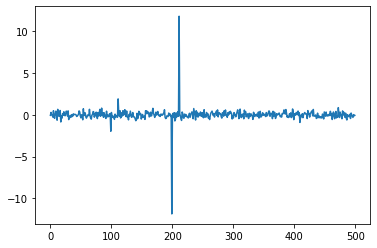

In [536]:
plt.plot(proj_onto_smallest_eigen)

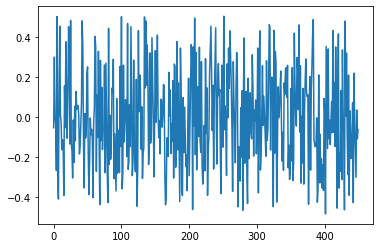

In [537]:
plt.plot(data_no_outlier)

## Manual Removal of Outliers without PCA

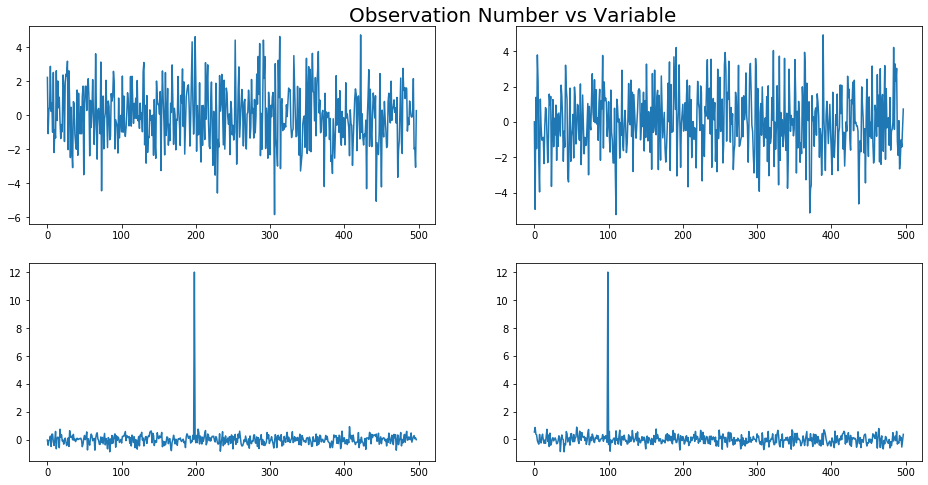

In [543]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot(np.arange(498), outlier_free_data[:,0])
axs[0,1].plot(np.arange(498), outlier_free_data[:,1])
axs[1,0].plot(np.arange(498), outlier_free_data[:,2])
axs[1,1].plot(np.arange(498), outlier_free_data[:,3])

_=plt.text(-250,30 ,'Observation Number vs Variable', size=20)

In [435]:
df2_nooutlier = df2[ (df2['X3'].between( df2['X3'].quantile(0.05), df2['X3'].quantile(.95) ))  &  (df2['X4'].between(df2['X4'].quantile(0.05), df2['X4'].quantile(.95))) ]

df2_nooutlier = df2_nooutlier.apply(lambda x: x-x.mean())

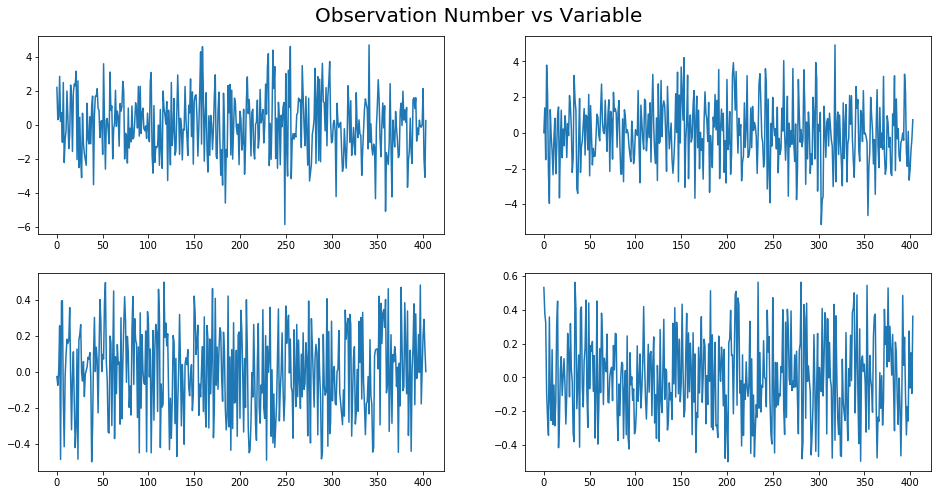

In [436]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

axs[0,0].plot(np.arange(404), df2_nooutlier.X1)
axs[0,1].plot(np.arange(404), df2_nooutlier.X2)
axs[1,0].plot(np.arange(404), df2_nooutlier.X3)
axs[1,1].plot(np.arange(404), df2_nooutlier.X4)

_=plt.text(-250,2.1 ,'Observation Number vs Variable', size=20)

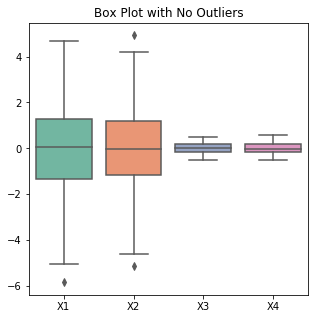

In [437]:
plt.subplots(1,1, figsize=(5,5))
sns.boxplot(data=df2_nooutlier, orient="v", palette="Set2")
_=plt.title("Box Plot with No Outliers")

In [439]:
pca_with_outlier = PCA(np.array(df2), 4)
pca_with_outlier.fit()

In [440]:
whitened_with_outlier = pca_with_outlier.whiten()

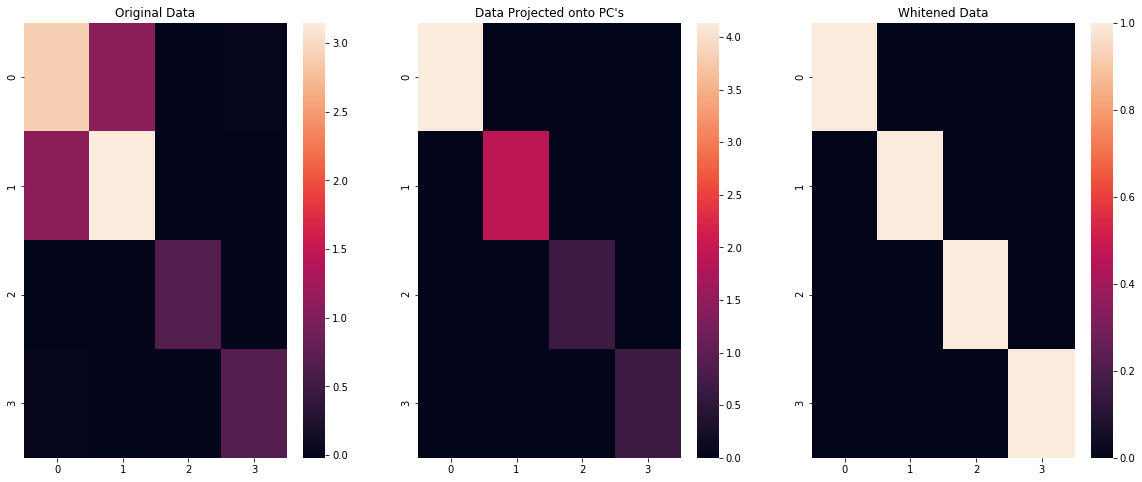

In [566]:
fig, axs = plt.subplots(1,3, figsize=(20,8))

sns.heatmap(np.cov(np.array(df2).T), ax=axs[0])
sns.heatmap(np.cov(pca_with_outlier.projection.T),  ax=axs[1])
sns.heatmap(np.cov(pca_with_outlier.whiten().T), ax=axs[2])

_=axs[0].set_title("Original Data")
_=axs[1].set_title("Data Projected onto PC's")
_=axs[2].set_title("Whitened Data")

In [442]:
pca_ = PCA(np.array(df2_nooutlier), 4)
pca_.fit()

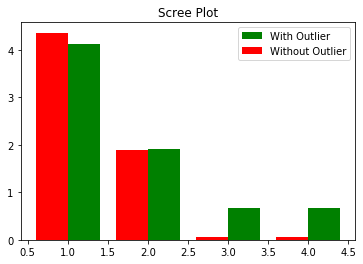

In [443]:
width=0.2
plt.bar(np.array([1,2,3,4])+width, pca_with_outlier.lambd , color='green', label="With Outlier", width = 0.4)
plt.bar(np.array([1,2,3,4])-width, pca_.lambd, color= 'red', label="Without Outlier", width = 0.4)
plt.legend()
_=plt.title('Scree Plot')

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
If dimensionailty reduction is performed, eg: 2 Dimensional Subspace, data without outlier would perform better during reconstruction. (Since more variance is explained by less variance, therefore lesser variance loss)

</p>

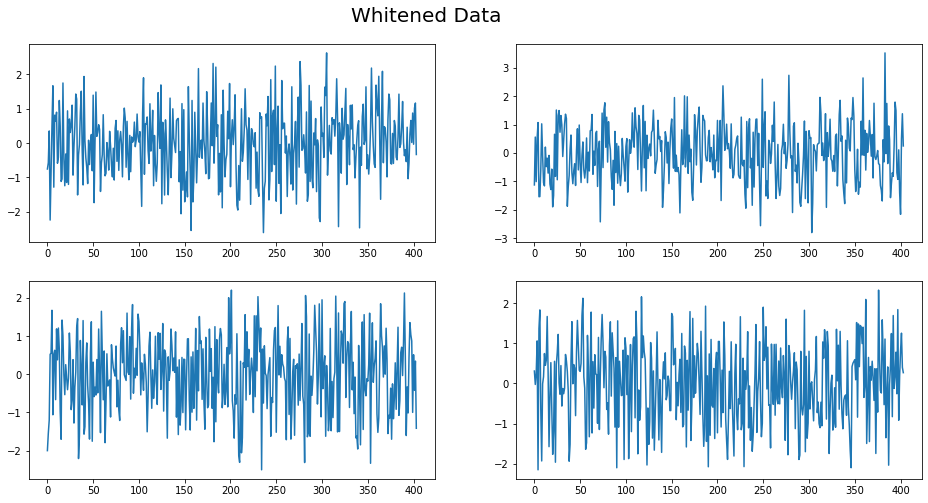

In [444]:
fig, axs = plt.subplots(2,2, figsize=(16,8))
axs[0,0].plot(np.arange(404), df2_nooutlier_whitened[:,0])
axs[0,1].plot(np.arange(404), df2_nooutlier_whitened[:,1])
axs[1,0].plot(np.arange(404), df2_nooutlier_whitened[:,2])
axs[1,1].plot(np.arange(404), df2_nooutlier_whitened[:,3])

_=plt.text(-200,9 ,'Whitened Data', size=20)

# Exercise 2.4: Oja’s Rule: Application

## Batch PCA

In [12]:
X = pd.read_csv('dataset/data-onlinePCA.txt', sep=",")
XX = np.array(X)
XX = XX[:,[1,2]]

CC = []
for i in range(10):
    CC.append(np.repeat(i, 200))
CC=np.array(CC)
CC = CC.flatten()

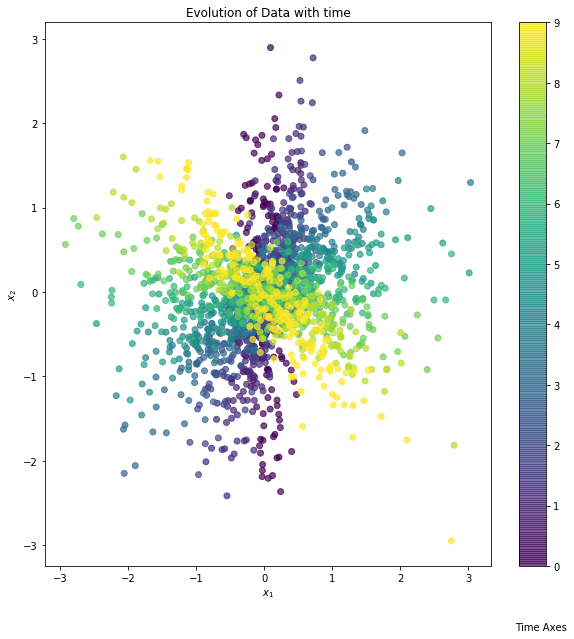

In [13]:
%matplotlib inline
plt.subplots(1,1, figsize=(10,10))
plt.scatter(XX[:,0],XX[:,1], c=CC, alpha=0.7)
plt.colorbar()
_=plt.title('Evolution of Data with time')
_=plt.text(3.7,-4,"Time Axes")
_=plt.xlabel('$x_1$')
_=plt.ylabel('$x_2$')

In [14]:
from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)
CCC = []
for i in colors.items():
    CCC.append(np.repeat(i[0],1))
CCC = np.array(CCC)
CCC = CCC.flatten()

In [15]:
%matplotlib inline
from ipywidgets import interactive



def f(time):
    plt.scatter(XX[int(200*time):int(time*200)+200,0],XX[int(200*time):int(time*200)+200,1],color='b')
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()
    

    
interactive_plot = interactive(f, time=(0,9))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=4, description='time', max=9), Output(layout=Layout(height='350px'))), _…

In [16]:
chunks = []
for i in range(10):
    chunks.append(XX[int(200*i):int(i*200)+200,:])
chunks = np.array(chunks)

In [17]:
pcas = [PCA(chunks[i],2) for i in range(10)]
for i in pcas:
    i.fit()

In [18]:
%matplotlib inline
from ipywidgets import interactive



def f(time):
    plt.scatter(XX[int(200*time):int(time*200)+200,0],XX[int(200*time):int(time*200)+200,1],color='b')
    plt.plot([0,2*pcas[time].eigenvec[:,0][0]],[0,2*pcas[time].eigenvec[:,0][1]], color='red', label='PC without outlier')
    plt.plot([0,2*pcas[time].eigenvec[:,1][0]],[0,2*pcas[time].eigenvec[:,1][1]], color='k')
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()
    

    
interactive_plot = interactive(f, time=(0,9))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot
    

interactive(children=(IntSlider(value=4, description='time', max=9), Output(layout=Layout(height='350px'))), _…

In [19]:
eigen = []
for i in range(10):
    eigen.append(pcas[i].eigenvec)
eigen = np.array(eigen)


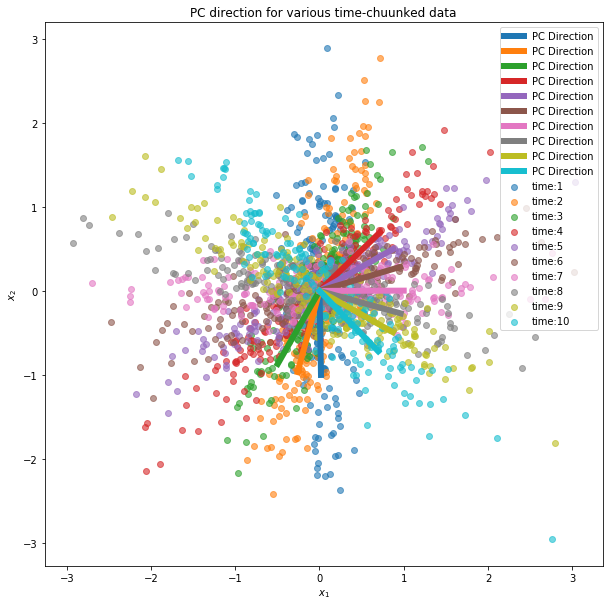

In [20]:
plt.subplots(1,1, figsize=(10,10))

for i,j in zip(range(10),CCC):
    plt.scatter(chunks[i][:,0],chunks[i][:,1], c=j, alpha=0.6, label='time:{}'.format(i+1))

_=plt.xlabel('$x_1$')
_=plt.ylabel('$x_2$')

for i,j in zip(eigen,CCC):
    plt.plot([0,i[:,0][0]],[0,i[:,0][1]], color=j, label='PC Direction', lw=6)
plt.legend()
_=plt.title('PC direction for various time-chuunked data')

## Online PCA

In [21]:
data = pd.read_csv('dataset/data-onlinePCA.txt', index_col=0, sep=",")
data = np.array(data)

In [22]:
def oja_weight_update(data, E):
    weights         = np.random.rand(data.shape[1])
    weights         = weights / LA.norm(weights)
    weights_updated = np.empty(data.shape[1])
    
    keep_track = []
    for i in data:
        weights_updated = weights  + ( (E*np.dot(i,weights))* (i- (np.dot(i,weights)*weights) ) )
        weights = weights_updated
        keep_track.append(weights) 
    keep_track = np.array(keep_track)
    return(keep_track)    

In [23]:
E_04  =  oja_weight_update(data, 0.04)
E_002 =  oja_weight_update(data, 0.002)
E_45  =  oja_weight_update(data, 0.45)

interactive(children=(IntSlider(value=4, description='time', max=9), Dropdown(description='learning_rate', opt…

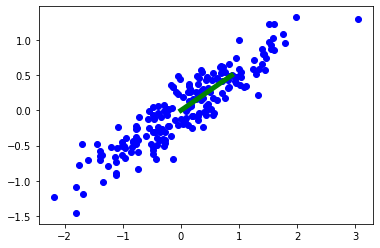

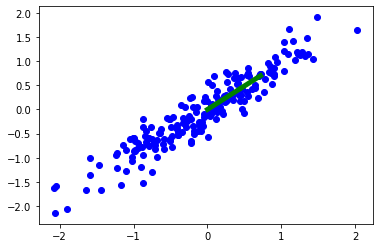

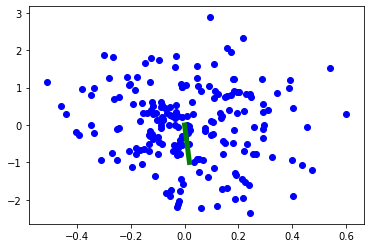

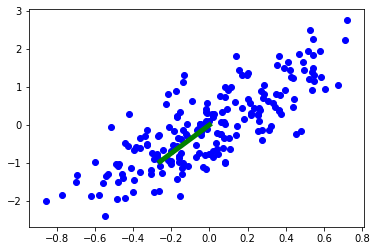

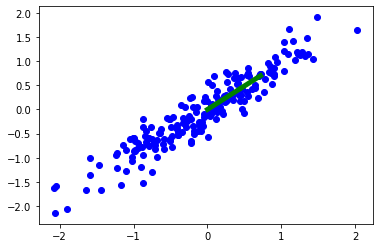

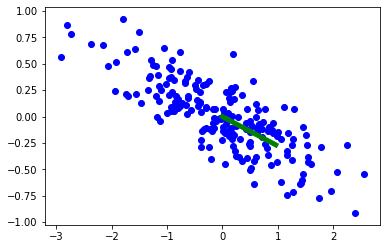

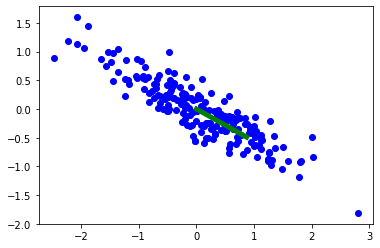

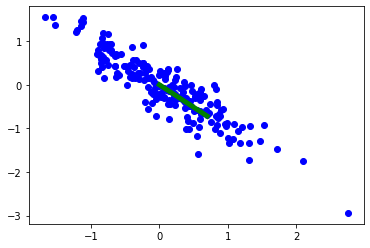

In [25]:
%matplotlib inline
from ipywidgets import interactive



def f(time,learning_rate):

    plt.scatter(XX[int(200*time):int(time*200)+200,0],XX[int(200*time):int(time*200)+200,1],color='b')

    plt.plot([0,eigen[time][:,0][0]],[0,eigen[time][:,0][1]], color='g', label='PC Direction', lw=5)
   # plt.plot([0,eigen[time][:,0][0]],[0,eigen[time][:,0][1]], color='g', label='PC Direction', lw=5)
    #plt.plot(oja_weight_update(data, learning_rate))
    plt.arrow( 0,0,5*eigen[((time+1)*200)-1][0], 5*eigen[((time+1)*200)-1][1],color='r')
    
    plt.arrow( 0,0,oja_weight_update(data, learning_rate)[((time+1)*200)-1][0], oja_weight_update(data, learning_rate)[((time+1)*200)-1][1],color='g', lw=2)
    
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.show()


    
interactive_plot = interactive(f, time=(0,9), learning_rate=[0.04,0.02,0.45])
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

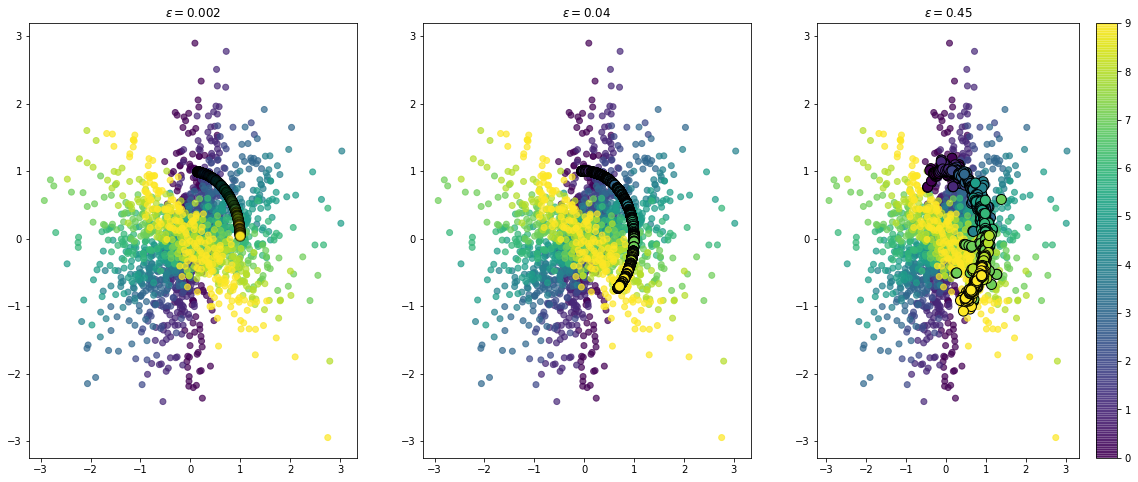

In [26]:

fig, axs = plt.subplots(1,3, figsize=(20,8))

im = axs[0].scatter(data[:,0],data[:,1], c=CC, alpha=0.7)
axs[1].scatter(data[:,0],data[:,1], c=CC, alpha=0.7)
axs[2].scatter(data[:,0],data[:,1], c=CC, alpha=0.7)

axs[0].scatter(E_002[:,0],E_002[:,1], c=CC, marker='o', s=100, edgecolor='k', alpha=0.1)
axs[1].scatter(E_04[:,0],E_04[:,1], c=CC, marker='o', s=100, edgecolor='k')
axs[2].scatter(E_45[:,0],E_45[:,1], c=CC, marker='o', s=100, edgecolor='k')
    
axs[0].title.set_text('$\epsilon = 0.002$')
axs[1].title.set_text('$\epsilon = 0.04$')
axs[2].title.set_text('$\epsilon = 0.45$')

_=fig.colorbar(im)

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
    <b> Cross Validating Learning-Rate?</b> <br>
- Compare with a moving window batch PCA <br>
- Keep track of reconstruction error
</p>